In [1]:
# How to use our code for the Applied Data Science coursework
# 1. Import our package(s) and other useful tools
import pandas as pd
from applied_data_science.sentiment_pipeline import SentimentPipeline
from applied_data_science.time_series import generate_time_series
import matplotlib.pyplot as plt

In [2]:
# 2. Load your tweets into a Pandas DataFrame, must have at least two columns: text (type string) and date (type datetime)
df = pd.read_csv('data.csv', encoding = 'latin', header=None) # load example data
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text'] # set column names
df = df.drop(['query', 'user_id', 'sentiment', 'id'], axis=1) # drop extra columns
df['date'] = pd.to_datetime(df['date'], format="%a %b %d %H:%M:%S PDT %Y") # parse dates e.g. Tue Jun 16 08:40:50 PDT 2009
df.head(10)

,date,text
0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...
2,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all...."
5,2009-04-06 22:20:00,@Kwesidei not the whole crew
6,2009-04-06 22:20:03,Need a hug
7,2009-04-06 22:20:03,@LOLTrish hey long time no see! Yes.. Rains a...
8,2009-04-06 22:20:05,@Tatiana_K nope they didn't have it
9,2009-04-06 22:20:09,@twittera que me muera ?


In [3]:
# 3. Process your tweets in the sentiment pipelien
# set workers <= CPU cores, set chunksize based on dataset size (my data has 1.6 million tweets)
# threshold reccommended by VADER docs, change default labels if you want
# configure cleaning techniques (making text lower case, removing URLs, removing usernames, remove the # of a hashtag but keeping the text)
pipe = SentimentPipeline(workers=10, chunksize=100000, make_lower=False, remove_url=True, remove_user=True, remove_hash=False, threshold=0.05, pos_label=1, neu_label=0, neg_label=-1) 
df = pipe(df)
df.head(10) # note it is now indexed by time


CLEANING
100%|██████████| 1600000/1600000 [00:01<00:00, 1217438.31it/s]

ANALYSING
100%|██████████| 1600000/1600000 [00:11<00:00, 145305.33it/s]

CLASSIFYING
100%|██████████| 1600000/1600000 [00:00<00:00, 2688989.30it/s]

DONE


,text,sentiment_score,sentiment
date,,,
2009-04-06 22:19:45,"- Awww, that's a bummer. You shoulda got ...",-0.0173,0
2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,-0.7500,-1
2009-04-06 22:19:53,I dived many times for the ball. Managed to ...,0.4939,1
2009-04-06 22:19:57,my whole body feels itchy and like its on fire,-0.2500,-1
2009-04-06 22:19:57,"no, it's not behaving at all. i'm mad. why a...",-0.4939,-1
2009-04-06 22:20:00,not the whole crew,0.0000,0
2009-04-06 22:20:03,Need a hug,0.4767,1
2009-04-06 22:20:03,"hey long time no see! Yes.. Rains a bit ,on...",0.6208,1
2009-04-06 22:20:05,nope they didn't have it,0.0000,0


<AxesSubplot:ylabel='Frequency'>

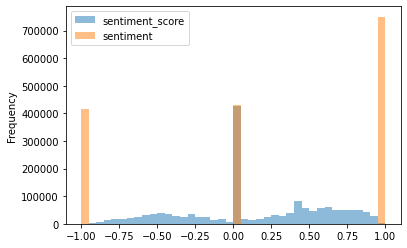

In [4]:
# Optional: visualise sentiment distribution
df.plot.hist(bins=40, alpha=0.5)

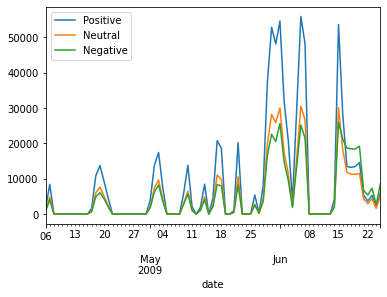

In [5]:
# 4. Generate time series data of tweet sentiment
pos, neu, neg = generate_time_series(df)

ax = plt.gca()
pos.plot(kind='line',y='count', ax=ax)
neu.plot(kind='line',y='count', ax=ax)
neg.plot(kind='line',y='count', ax=ax)
ax.legend(["Positive", "Neutral", "Negative"])
plt.show()